# only compare online or pseudo-online performance

In [11]:
%reload_ext autoreload
%autoreload 2
%load_ext snakeviz
%load_ext line_profiler
%reload_ext cython
import pickle
import pandas as pd 
from pyneurode.spike_sorter import *
import sys
sys.path.append('..\\spikeforest_comparison')
sys.path.append('..\\')


import spikeinterface as si
import spikeinterface.comparison as sc
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.toolkit as st
import spikeinterface.widgets as sw
from tqdm import tqdm
import seaborn as sns 

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


### Loading previously detected spikes

In [2]:
# load previous collected spikes
print('Loading spike data')
# path = 'D:\Documents\GitHub\spikeforest_comparison\data\df_sort_M1_D20_45_th5.pkl'
path = '../data/df_sort_M1_D20_45_th5.pkl'
with open(path,'rb') as f:
    df_list = pickle.load(f)

df = pd.concat(df_list)   
df.reset_index() #make sure no index has duplicates

# Save the online cluster id to another column
df.rename(columns={'cluster_id':'cluster_id_online'},inplace=True)
# df

Loading spike data


### Clusting-TM split

In [63]:

# %% Sorting spikes
print('Sorting spikes')
training_spikes = 20000
df_sort = df.loc[:, ['spike_waveform','time','electrode_ids','channel_ids','spike_id','timestamps','acq_timestamps']] # remove other columns

# train template
df_train,pca_transformer,standard_scalers = sort_all_electrodes(df_sort.iloc[:training_spikes].copy(), pca_component=3, verbose=True) #sort spikes

(templates, template_cluster_id, template_electrode_id) = generate_spike_templates(df_train)
print(f'Number of template {len(templates)}')

# template match all subsequent neurons
df_sortc = df_sort.copy()

Sorting spikes
Aligning spikes
Sorting electrode 1
use normalized pc
Sorting electrode 2
use normalized pc
Sorting electrode 0
use normalized pc
Sorting electrode 3
use normalized pc
Number of template 14


In [77]:
df_matched = template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id)

### Measure performance

In [11]:
%timeit df_matched = template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id)

6.82 s ± 31.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
df_matched = template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id, pca_transformer, standard_scalers)

In [8]:
%timeit df_matched = template_match_all_electrodes(df_sortc, templates, template_electrode_id, template_cluster_id,pca_transformer, standard_scalers)

16.6 s ± 1.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
sorted_df = template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id)
sorted_df

,spike_waveform,time,electrode_ids,channel_ids,spike_id,timestamps,acq_timestamps,cluster_id,spike_waveform_aligned,sorting_time,pc_norm
0,"[-0.05250948, -0.14332052, -0.022488609, 0.048...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,375862,1.615648e+09,C1_5,"[0.048003923147916794, -0.21444782614707947, -...",0.000418,None
1,"[-0.5246422, -0.609553, -0.35305232, -0.039588...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,376256,1.615648e+09,C1_2,"[-0.039588578045368195, -0.12017491459846497, ...",0.000180,None
2,"[-0.45728362, 0.3922822, 0.60337937, 0.3992793...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,376899,1.615648e+09,C1_3,"[0.3992793560028076, -0.10937236249446869, -0....",0.000158,None
3,"[0.46189496, 1.5869086, 1.8508329, 1.4992404, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,377838,1.615648e+09,C2_1,"[1.4992403984069824, 1.132098913192749, 0.6527...",0.000112,None
4,"[0.909833, 0.2761541, 0.17282563, 0.516779, 1....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,377887,1.615648e+09,C1_2,"[0.5167790055274963, 1.1071397066116333, 1.749...",0.000123,None
...,...,...,...,...,...,...,...,...,...,...,...
10,"[0.06949595, 0.29736862, 0.81068987, 1.116027,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10,9118576,1.615648e+09,C0_3,"[1.1160269975662231, 0.888058602809906, 0.3635...",0.000083,None
11,"[0.16372728, -0.009656481, 0.16306406, -0.3709...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,9118598,1.615648e+09,C2_2,"[-0.3709728717803955, -1.4567493200302124, -1....",0.000083,None
12,"[-0.8042053, -0.5876875, 0.13034075, 0.6422738...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12,9118667,1.615648e+09,C1_5,"[0.6422738432884216, 0.7085359692573547, 0.359...",0.000084,None
13,"[-0.020245934, 1.4837929, 1.8430108, 1.3749459...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",13,9118788,1.615648e+09,C3_1,"[1.374945878982544, 0.7906058430671692, 0.8324...",0.000085,None


<AxesSubplot:xlabel='sorting_time', ylabel='Count'>

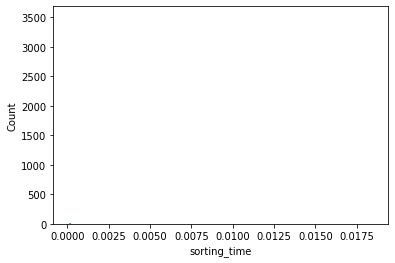

In [6]:
# sorted_df.sorting_time.hist(bins=100)
sns.histplot(x='sorting_time',data=sorted_df)

In [19]:
%snakeviz template_match_all_electrodes_fast(df_sortc, templates, template_electrode_id, template_cluster_id)

 
*** Profile stats marshalled to file 'C:\\Users\\teristam\\AppData\\Local\\Temp\\tmpxtet3l3i'. 
Embedding SnakeViz in this document...


### Testing Cython integration

In [4]:
from pyneurode.spike_sorter import align_spike as align_spike_py

In [5]:
spikewaveform = np.stack(df_sort.spike_waveform.to_numpy())

In [6]:
%timeit align_spike_py(spikewaveform)

456 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%%cython -a
# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1

import numpy as np 
cimport numpy as np
cimport cython 

@cython.boundscheck(False)
@cython.wraparound(False)
def align_spike_cy(spikes, int chan_per_electrode=4, int search_span = 15, int pre_peak_span=15, int post_peak_span = 15,
    int align_sign=-1):
    # align spikes to max absolute spike
    # spikes is in the form (index x time), if it is from tetrode, then the waveform of all channel should be already concatenated in the time axis
    # it finds the maximum point along the time axis, then shift all channel in the tetrode such that maximum is at the centre
    #TODO: potential racing condition when spike from two channel are of similar height
    
  

    assert spikes.ndim == 2, 'Spikes must be a 2d array'
    assert spikes.dtype == np.float32, 'Spike datatype must be np.float32'
        
    cdef int nspikes, spike_total_length
    nspikes = spikes.shape[0]
    spike_total_length = spikes.shape[1]

    if align_sign == -1:
        # only align to the negative peaks
        spikes2 = spikes.copy()
        spikes2[spikes2>0] = 0
    else:
        spikes2 = spikes
    
    abs_spike = np.abs(spikes2)
    
    cdef int spike_length # length of each waveform
    spike_length = spikes.shape[1]//chan_per_electrode
    
    #Create a mask to restrict the search region
    # set the signal output the mask to be zero
    mask = np.zeros_like(abs_spike)
    search_region = [np.arange(spike_length/2-search_span,spike_length/2+search_span)
        +i*spike_length for i in range(chan_per_electrode) ]
    search_region = np.concatenate(search_region).astype(int)
    mask[:,search_region] = 1

    #only search the masked region
    masked_spike = abs_spike*mask 

    peak_idx = masked_spike.argmax(axis=1)


    # find out which channel it is 
    chan_idx = peak_idx//spike_length
    idx_rel_chan = peak_idx%spike_length #index of peak within that channel
    
    cdef long long [:] idx_rel_chan_memview
    idx_rel_chan_memview = idx_rel_chan
    
    cdef np.float32_t [:,:,::1] spikes_channel_memview
    cdef np.float32_t [:,:,::1] spikes_aligned_memview
    spikes_channel = spikes.reshape(-1,chan_per_electrode,spike_length) # n x time x channel
    spikes_aligned = np.zeros((spikes.shape[0],
                               chan_per_electrode, (pre_peak_span+post_peak_span)),
                             dtype=np.float32)
    
    # use memory view to speed up computation
    spikes_channel_memview = spikes_channel
    spikes_aligned_memview = spikes_aligned
    

    # align each channel
    # pad the aligned signal with zero if the peak is too skewed to one side
    
    cdef int i, idx, start_idx, end_idx, copy_len
    cdef int first_half_length, second_half_length
    
    for i in range(nspikes):
        idx = idx_rel_chan_memview[i]
        
        start_idx = max(idx-pre_peak_span,0) #first half of spike
        end_idx =  min(idx+post_peak_span, spike_length) #second half of spike
        
        # Copy from the original waveform to the aligned one
        first_half_length = idx-start_idx
        second_half_length = end_idx-idx
        spikes_aligned_memview[i,:, (pre_peak_span-first_half_length):(pre_peak_span+second_half_length)] = spikes_channel_memview[i, :, start_idx:end_idx]
        
    return spikes_aligned.reshape(nspikes,-1)

In [31]:
%timeit align_spike_cy(spikewaveform)

121 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
%lprun -f align_spike_cy -u 1e-3 align_spike_cy(spikewaveform)

Timer unit: 0.001 s

Total time: 0.452471 s
File: C:\Users\teristam\.ipython\cython\_cython_magic_d1068b3e4dc9ba4fb1a23844283017fb.pyx
Function: align_spike_cy at line 11

Line #      Hits         Time  Per Hit   % Time  Line Contents
    11                                           def align_spike_cy(spikes, int chan_per_electrode=4, int search_span = 15, int pre_peak_span=15, int post_peak_span = 15,
    12                                               int align_sign=-1):
    13                                               # align spikes to max absolute spike
    14                                               # spikes is in the form (index x time), if it is from tetrode, then the waveform of all channel should be already concatenated in the time axis
    15                                               # it finds the maximum point along the time axis, then shift all channel in the tetrode such that maximum is at the centre
    16                                               #TODO

In [17]:
np.allclose(align_spike_cy(spikewaveform),align_spike_py(spikewaveform))

True

In [102]:
%snakeviz align_spike_cy(spikewaveform)

 
*** Profile stats marshalled to file 'C:\\Users\\teristam\\AppData\\Local\\Temp\\tmpwdtseoh3'. 
Embedding SnakeViz in this document...


### Template matching

In [ ]:
%timeit df_matched = template_match_all_electrodes_np(df_sortc, templates, template_electrode_id, template_cluster_id)

In [96]:
%%cython -a
# cython: linetrace=True
# cython: binding=True
# distutils: define_macros=CYTHON_TRACE_NOGIL=1

cimport numpy as np
from pyneurode.spike_sorter import template_matching
from pyneurode.spike_sorter_cy import align_spike_cy
import numpy as np

def template_match_all_electrodes_cy(df, templates, template_electrode_id, template_cluster_id, 
                pca_transformers = None, standard_scalers = None):
    ''' 
    Match input spike wavefrom to the closest template, matching is done on each tetrode independently
    '''
    
    # cluster label is in the form of 101,102 etc. The x//100 represents the tetrode
    # x%100 represent the cluster in that tetrode
    labels_template= np.zeros((len(df),))
    norm_dist_template = np.zeros_like(labels_template)
    
    if pca_transformers is not None:
        pc_norms = np.zeros((len(df), pca_transformers[0].n_components ))
    
    spikes = np.stack(df.spike_waveform.to_numpy())
    electrode_ids = df.electrode_ids.to_numpy()
    aligned_waveforms = align_spike_cy(spikes)
    
    # Template match each electrode 
    cdef int i, eid
    
    for i in range(len(electrode_ids)):
        
        eid = electrode_ids[i]
        # do sorting independently for each electrode
        neigbour_idx = np.where(template_electrode_id == eid)[0] 

        if len(neigbour_idx) > 0:
            idx,norm_dist = template_matching(templates[neigbour_idx,:], aligned_waveforms[i,:])
            labels_template[i] = template_cluster_id[neigbour_idx[idx]]
            norm_dist_template[i] = norm_dist
        else:
            # no template found for a particular electrode
            # make them unclassified
            labels_template[i] = -1
            norm_dist_template[i] = -1

        if pca_transformers is not None:
            #Also do the PCA transform for monitoring purpose

            if eid in pca_transformers and pca_transformers[eid] is not None:
                pca_transformer = pca_transformers[eid]
                pc = pca_transformer.transform(aligned_waveforms.reshape(1,-1))
                pc_norm = standard_scalers[eid].transform(pc)
                pc_norms[i,:] = pc_norm.ravel()
           
            else:
                pc_norms[i,:] = -1


    df['cluster_id'] = labels_template #make plotting program aware this is a categorical variable
    df['dist_tm'] = norm_dist_template
    df['spike_waveform_aligned'] = aligned_waveforms.tolist()
    if pca_transformers is not None:
        df['pc_norm'] = pc_norms

    return df 

In [94]:
%timeit df_matched_cy = template_match_all_electrodes_cy(df_sortc, templates, template_electrode_id, template_cluster_id)

2.92 s ± 73.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [98]:
%lprun -u 1e-3 -f template_match_all_electrodes_cy template_match_all_electrodes_cy(df_sortc, templates, template_electrode_id, template_cluster_id)

Timer unit: 0.001 s

Total time: 4.84429 s
File: C:\Users\teristam\.ipython\cython\_cython_magic_459da7358c804c36939056c7e66e8654.pyx
Function: template_match_all_electrodes_cy at line 10

Line #      Hits         Time  Per Hit   % Time  Line Contents
    10                                           def template_match_all_electrodes_cy(df, templates, template_electrode_id, template_cluster_id, 
    11                                                           pca_transformers = None, standard_scalers = None):
    12                                               ''' 
    13                                               Match input spike wavefrom to the closest template, matching is done on each tetrode independently
    14                                               '''
    15                                               
    16                                               # cluster label is in the form of 101,102 etc. The x//100 represents the tetrode
    17                         

In [82]:
df_matched_cy = template_match_all_electrodes_cy(df_sortc, templates, template_electrode_id, template_cluster_id)

In [83]:
np.all(df_matched_cy.cluster_id == df_matched.cluster_id)

True

### Template matching

In [105]:
spikes = np.stack(df_sortc.spike_waveform.to_numpy())
electrode_ids = df_sortc.electrode_ids.to_numpy()
aligned_waveforms = align_spike_cy(spikes)
eid = electrode_ids[0]
neigbour_idx = np.where(template_electrode_id == eid)[0]

In [108]:
%%cython
cimport numpy as np 
import numpy as np 

def template_matching_mse_cy(templates, spike_waveform):
    # Match a spike waveform to template
    # return the index of minimum template, as well as the distance
    # TODO: reject outliner
    
    cdef np.ndarray()
    d = np.mean((spike_waveform - templates)**2,axis=1) # MSE is equivalent to Euclidean distance

    idx = np.argmin(d)

    return idx
    

In [110]:
%timeit template_matching_mse_cy(templates[neigbour_idx,:], aligned_waveforms[0,:])

21.8 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
